In [2]:
import pandas as pd
import numpy as np

# 1) ساخت DataFrame مصنوعی
np.random.seed(42)

df = pd.DataFrame({
    "age": np.random.randint(18, 66, size=15),
    "income": np.random.randint(30000, 150001, size=15),
    "visits": np.random.randint(1, 13, size=15)
})

# 2) ایجاد چند مقدار NaN در income
df.loc[[2, 7, 11], "income"] = np.nan

# 3) پر کردن NaNها با median
median_income = df["income"].median()
df["income"] = df["income"].fillna(median_income)

# 4) Feature Engineering
df["income_per_visit"] = df["income"] / df["visits"]

# 5) نمایش 3 ردیف با بیشترین income_per_visit
top_3 = df.sort_values(by="income_per_visit", ascending=False).head(3)

top_3


,age,income,visits,income_per_visit
2,32,91345.0,1,91345.00
13,57,115305.0,3,38435.00
11,41,91345.0,4,22836.25


In [3]:
import numpy as np

# 1) ساخت آرایه تصادفی
np.random.seed(42)
data = np.random.uniform(0, 100, size=200)

# 2) انتخاب شرطی: اعداد بزرگ‌تر از 60
filtered = data[data > 60]

# 3) آمار زیرمجموعه
filtered_mean = filtered.mean()
filtered_std = filtered.std()
filtered_count = filtered.size

# 4) آمار کل آرایه
total_mean = data.mean()
total_std = data.std()
total_count = data.size

# 5) چاپ نتایج
print("=== Numbers > 60 ===")
print(f"Count: {filtered_count}")
print(f"Mean: {filtered_mean:.2f}")
print(f"Std: {filtered_std:.2f}")

print("\n=== All Numbers ===")
print(f"Count: {total_count}")
print(f"Mean: {total_mean:.2f}")
print(f"Std: {total_std:.2f}")


=== Numbers > 60 ===
Count: 78
Mean: 80.08
Std: 11.47

=== All Numbers ===
Count: 200
Mean: 48.40
Std: 29.42


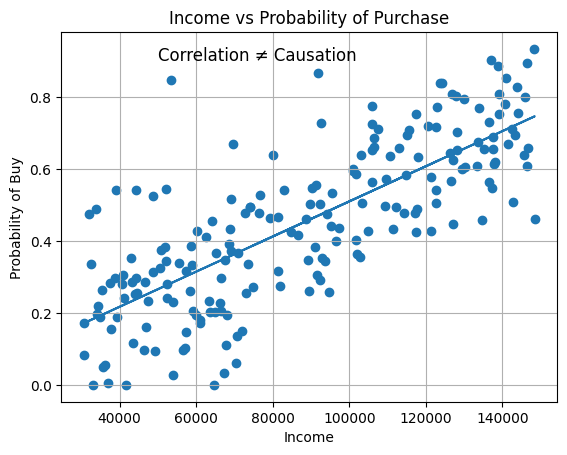

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1) ساخت داده مصنوعی
np.random.seed(42)

income = np.random.uniform(30000, 150000, size=200)

# رابطه ظاهری + نویز
probability_of_buy = (
    0.000005 * income + np.random.normal(0, 0.15, size=200)
)

# محدود کردن بین 0 و 1
probability_of_buy = np.clip(probability_of_buy, 0, 1)

# 2) Scatter plot
plt.figure()
plt.scatter(income, probability_of_buy)
plt.xlabel("Income")
plt.ylabel("Probability of Buy")

# 3) خط trend ساده (Linear fit)
z = np.polyfit(income, probability_of_buy, 1)
p = np.poly1d(z)
plt.plot(income, p(income))

# 4) متن هشدار
plt.text(
    50000, 0.9,
    "Correlation ≠ Causation",
    fontsize=12
)

plt.grid(True)
plt.title("Income vs Probability of Purchase")
plt.show()


In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1) Synthetic data
np.random.seed(42)
n = 600

df = pd.DataFrame({
    "age": np.random.randint(18, 66, size=n),
    "income": np.random.randint(30000, 150001, size=n),
    "visits": np.random.randint(1, 11, size=n),
})

# 2) Target rule
df["target"] = ((df["income"] > 80000) & (df["visits"] > 5)).astype(int)

X = df[["age", "income", "visits"]]
y = df["target"]

# 3) Train/Test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 4) Logistic Regression (with scaling)
model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, random_state=42))
])

model.fit(X_train, y_train)

# 5) Evaluation
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:\n", cm)


Accuracy: 0.9000
Confusion Matrix:
 [[124   7]
 [ 11  38]]


In [ ]:
# If we use only age:
# The model performs close to random because age has no direct relationship with the target.

# If we use only income:
# Performance improves, but errors remain because income alone cannot capture the AND condition with visits.

# Why combining features matters:
# Many patterns come from interactions between features, not single variables. Multiple features allow the model to learn the true decision structure and reduce systematic bias.